This notebook walks through the group level analyses for Developmental differences in learning from large losses study. Details of the behavioral analyses can be found [here](https://zenkavi.github.io/DevStudy_Analyses/output/reports/DevStudy_MG_Behavior.nb.html).

Import packages

In [1]:
import glob
import nibabel as nib
from nilearn.image import concat_imgs
import numpy as np
import os
import pandas as pd
import re
import sys
sys.path.append(os.environ['SERVER_SCRIPTS'])
from utils.mni2vox import mni2vox
import warnings

Load plotting packages

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from nistats.reporting import plot_design_matrix, plot_contrast_matrix
from nilearn import plotting, image

%matplotlib inline

# Compare design matrices

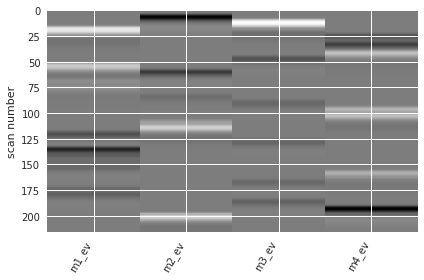

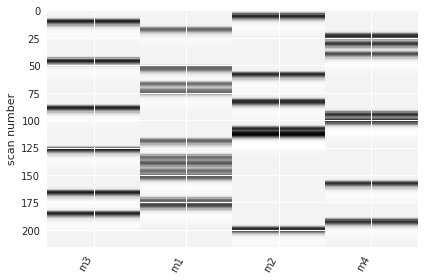

In [16]:
ev_dm = pd.read_csv("/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_1_ev/sub-100003/sub-100003_run-001_level1_pe_design_matrix.csv")
ev_dm=ev_dm[{"m1_ev","m2_ev", "m3_ev", "m4_ev"}]
dm = pd.read_csv("/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_1/sub-100003/sub-100003_run-001_level1_pe_design_matrix.csv")
dm=dm[{"m1","m2", "m3", "m4"}]
plot_design_matrix(ev_dm)
plot_design_matrix(dm)

In [21]:
ev_dm.head()

Index(['Unnamed: 0', 'hpe', 'hpe_derivative', 'junk', 'junk_derivative', 'lpe',
       'lpe_derivative', 'm1_ev', 'm1_ev_derivative', 'm1_rt',
       'm1_rt_derivative', 'm2_ev', 'm2_ev_derivative', 'm2_rt',
       'm2_rt_derivative', 'm3_ev', 'm3_ev_derivative', 'm3_rt',
       'm3_rt_derivative', 'm4_ev', 'm4_ev_derivative', 'm4_rt',
       'm4_rt_derivative', 'trans_x', 'trans_x_derivative1', 'trans_x_power2',
       'trans_x_derivative1_power2', 'trans_y', 'trans_y_derivative1',
       'trans_y_derivative1_power2', 'trans_y_power2', 'trans_z',
       'trans_z_derivative1', 'trans_z_power2', 'trans_z_derivative1_power2',
       'rot_x', 'rot_x_derivative1', 'rot_x_derivative1_power2',
       'rot_x_power2', 'rot_y', 'rot_y_derivative1', 'rot_y_power2',
       'rot_y_derivative1_power2', 'rot_z', 'rot_z_derivative1',
       'rot_z_power2', 'rot_z_derivative1_power2', 'std_dvars',
       'framewise_displacement', 'scrub', 'drift_1', 'drift_2', 'constant'],
      dtype='object')

In [19]:
dm.head()

,m3,m1,m2,m4
0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000679,0.0
2,0.0,0.0,0.019198,0.0
3,0.0,0.0,0.085619,0.0
4,0.0,0.0,0.172822,0.0


# Statistical tests

Level 3 script can be found [here](https://github.com/zenkavi/DevStudy_ServerScripts/blob/master/nistats/level_3/level_3.py)

## Model 1: Task regressors vs. baseline

Randomise cluster corrected p values

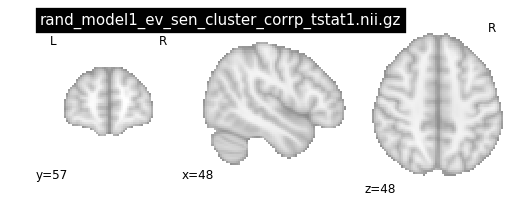

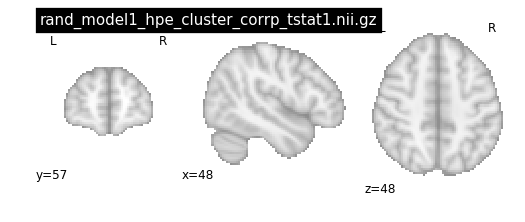

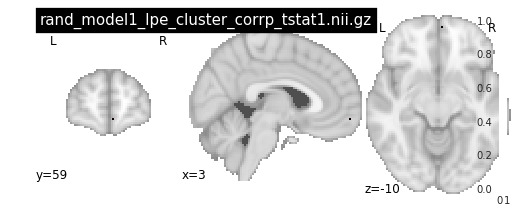

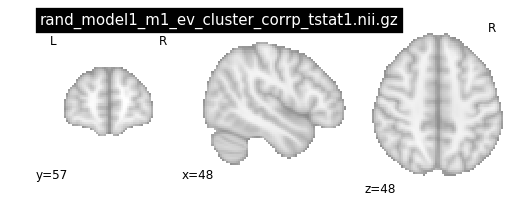

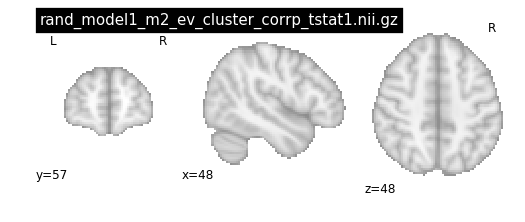

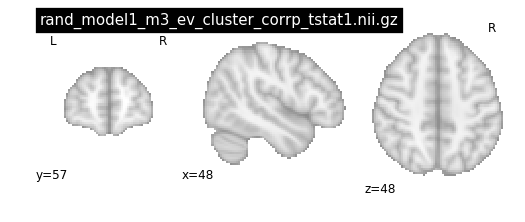

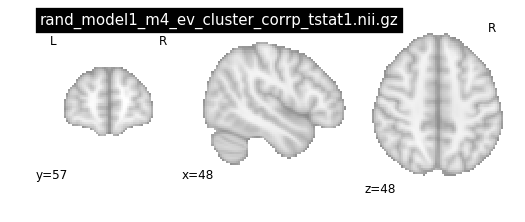

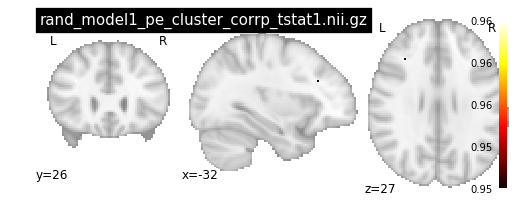

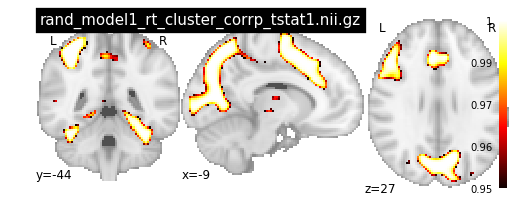

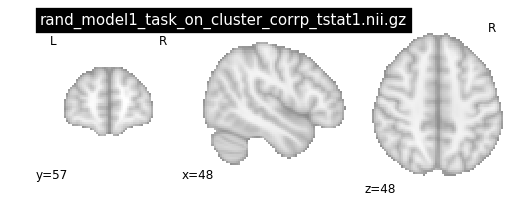

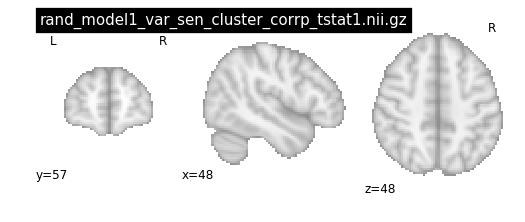

In [3]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3_ev/model1/*/*corrp_tstat1*')
neg_t_corrected_p_paths = [x for x in all_paths if "neg" in x]
neg_t_corrected_p_paths.sort()
pos_t_corrected_p_paths = [x for x in all_paths if "neg" not in x]
pos_t_corrected_p_paths.sort()

for i in range(0, len(pos_t_corrected_p_paths)):
    #determine display coordinates
    if any(x in os.path.basename(pos_t_corrected_p_paths[i]) for x in ['m1_ev', 'm2_ev', 'm3_ev', 'm4_ev', 'task_on']):
        fig = plotting.plot_stat_map(image.smooth_img(neg_t_corrected_p_paths[i],5), colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    else:
        fig = plotting.plot_stat_map(image.smooth_img(pos_t_corrected_p_paths[i],5), colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(image.smooth_img(pos_t_corrected_p_paths[i],5), threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
    fig.add_overlay(image.smooth_img(neg_t_corrected_p_paths[i],5), threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)

## Model 2: Task regressors for the three age groups

Randomise cluster corrected p values for F-test checking for difference in means across the three groups

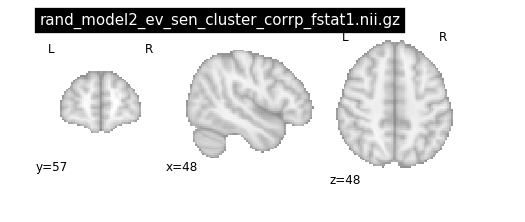

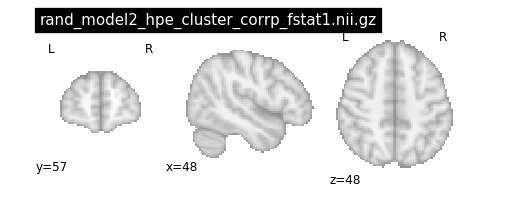

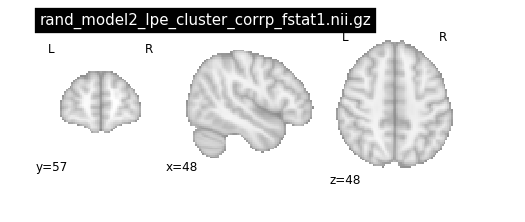

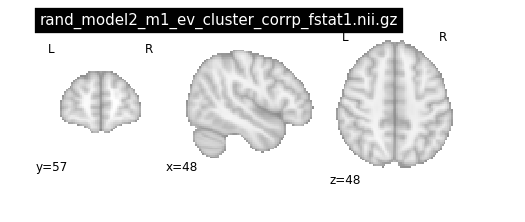

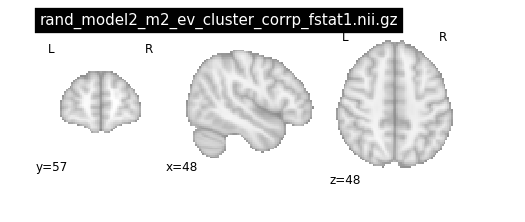

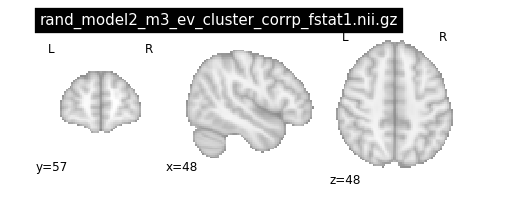

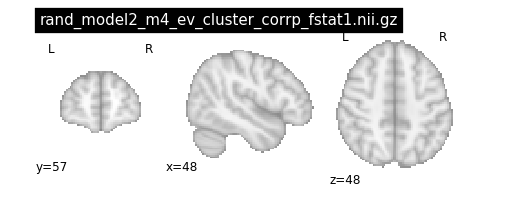

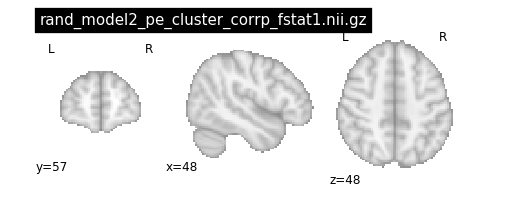

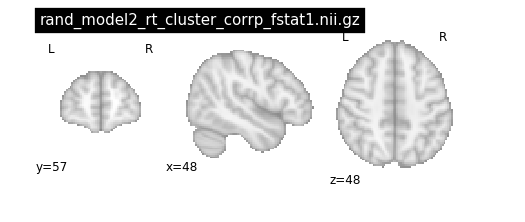

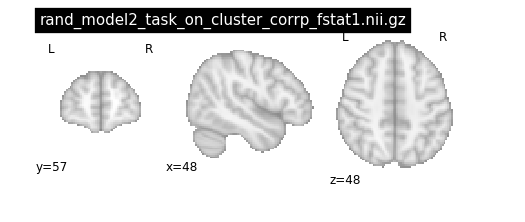

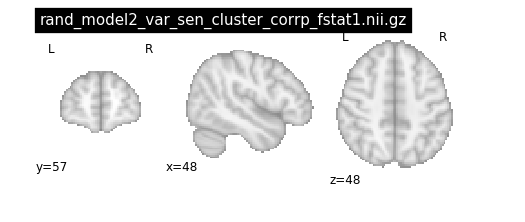

In [4]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3_ev/model2/*/*fstat*')
f_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' not in x]
f_corrected_p_paths.sort()
del all_paths

for i in range(0, len(f_corrected_p_paths)):
    fig = plotting.plot_stat_map(f_corrected_p_paths[i], colorbar=False, title=os.path.basename(f_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(f_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)

## Model 3: Task regressors for learners vs. non-learners

Learners: those who are more likely to make correct choices later in the task

Cluster corrected p-value maps for the t-test checking regions where relationship between task regressor and BOLD activity is stronger for learners compared to non-learners.

- Learners have larger activity in both but more so in the right frontal pole/middle frontal gyrus/inferiori frontal gyrus for positive EV machines compared to negative EV machines.

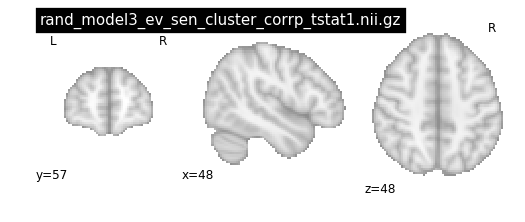

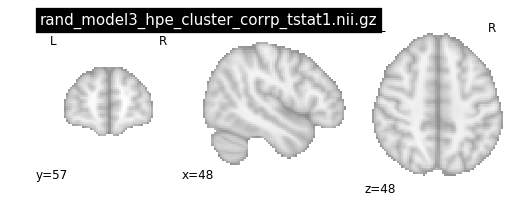

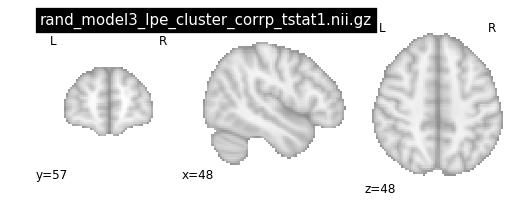

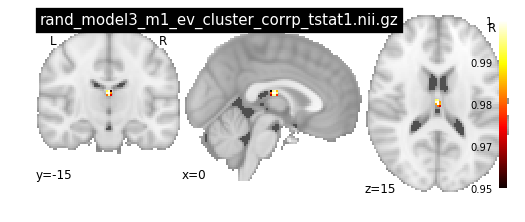

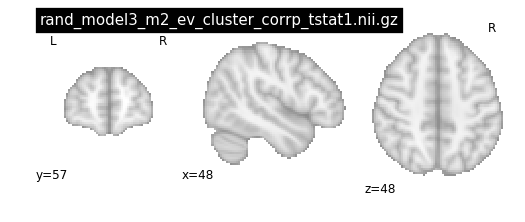

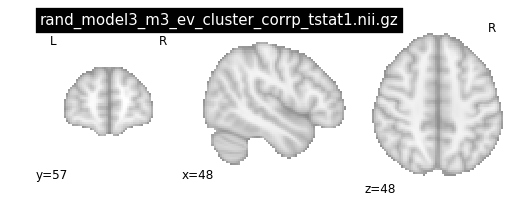

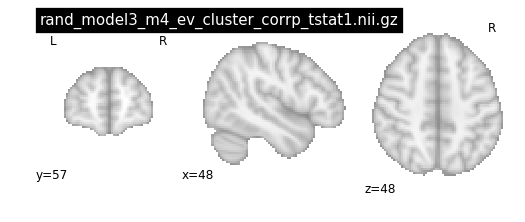

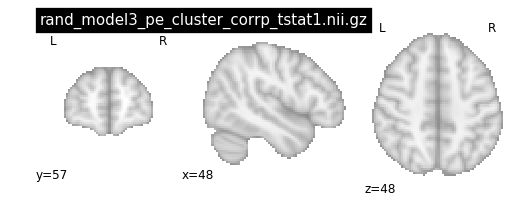

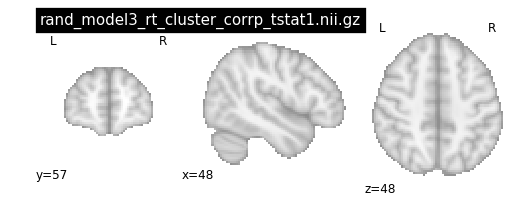

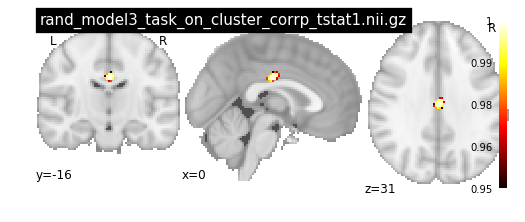

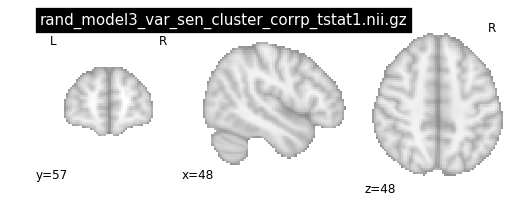

In [7]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3_ev/model3/*/*tstat1*')
pos_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' not in x]
pos_t_corrected_p_paths.sort()
neg_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' in x]
neg_t_corrected_p_paths.sort()
del all_paths

for i in range(0, len(pos_t_corrected_p_paths)):
    fig = plotting.plot_stat_map(pos_t_corrected_p_paths[i], colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(pos_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
    fig.add_overlay(neg_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)

## Model 4: Change in task regressors for learners vs. non-learners

Interactive model checking effect of first vs. second half of task, learner vs. non-learner and the interaction of these two factors

### Main effect of first vs. second half

Randomise cluster corrected p values

Nothing survives whole brain correction

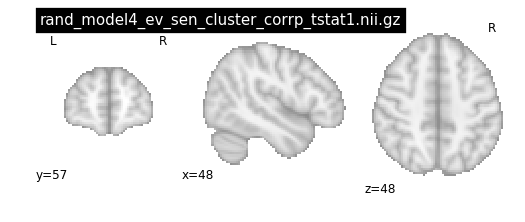

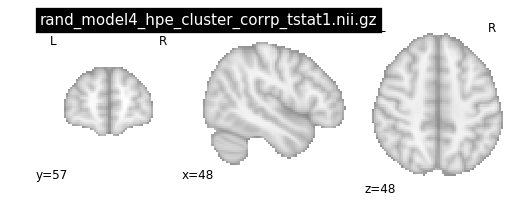

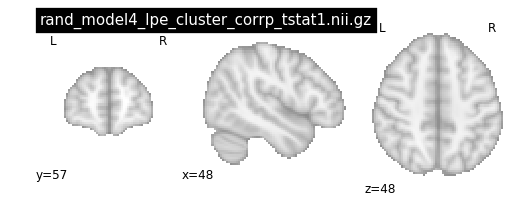

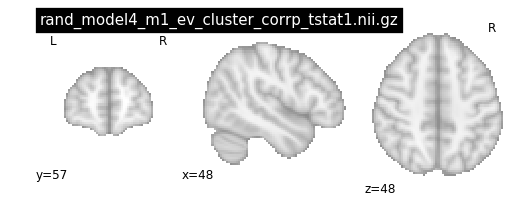

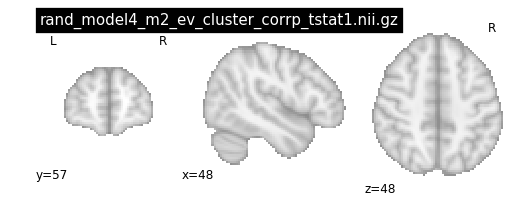

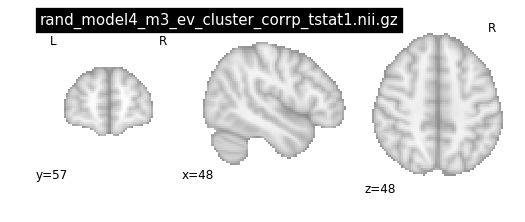

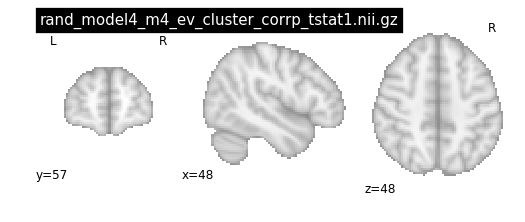

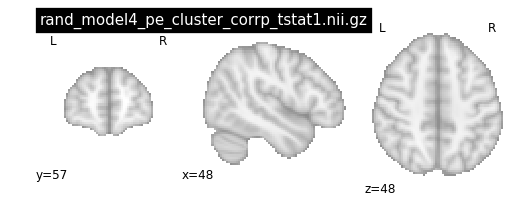

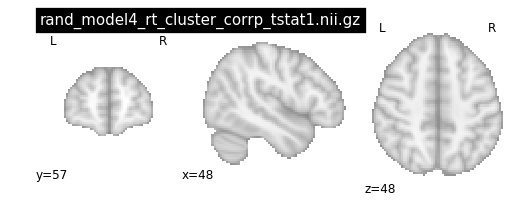

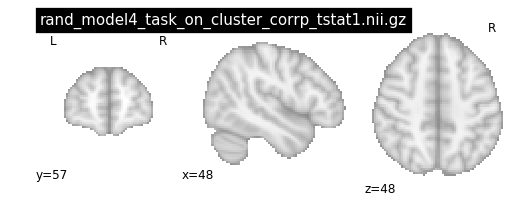

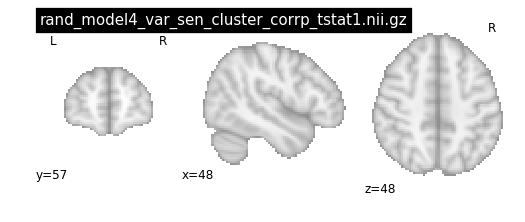

In [8]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3_ev/model4/*/*corrp_tstat1*')
pos_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' not in x]
pos_t_corrected_p_paths.sort()
neg_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' in x]
neg_t_corrected_p_paths.sort()
del all_paths

for i in range(0, len(pos_t_corrected_p_paths)):
    fig = plotting.plot_stat_map(pos_t_corrected_p_paths[i], colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(pos_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
    fig.add_overlay(neg_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)
    
    

### Main effect of learner vs. non-learner

Randomise corrected p values for the tmap

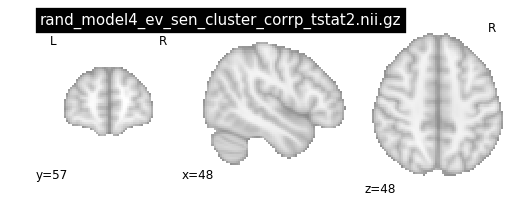

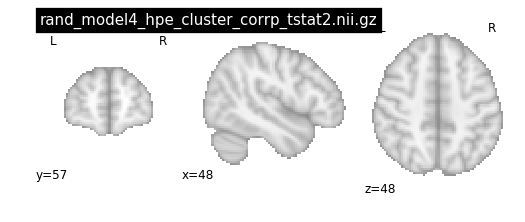

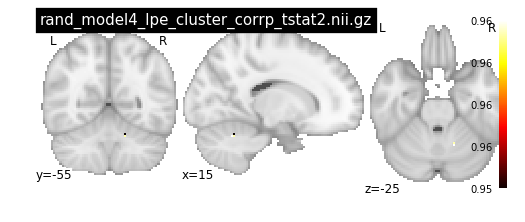

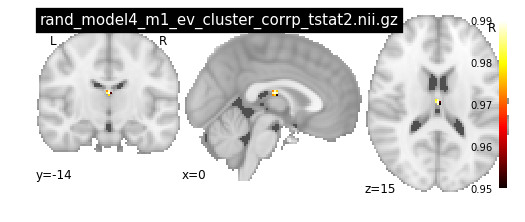

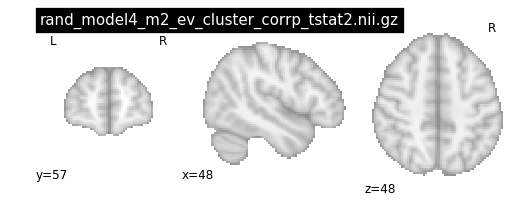

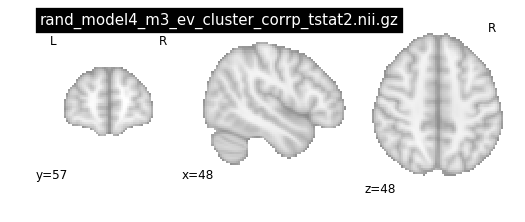

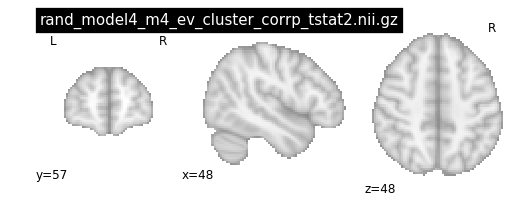

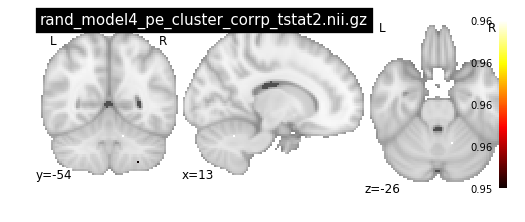

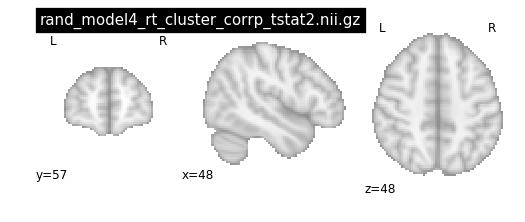

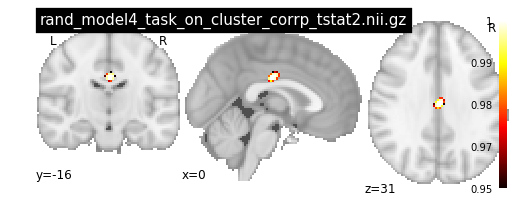

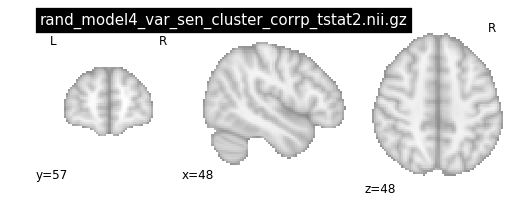

In [9]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3_ev/model4/*/*corrp_tstat2*')
pos_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' not in x]
pos_t_corrected_p_paths.sort()
neg_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' in x]
neg_t_corrected_p_paths.sort()
del all_paths

for i in range(0, len(pos_t_corrected_p_paths)):
    fig = plotting.plot_stat_map(pos_t_corrected_p_paths[i], colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(pos_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
    fig.add_overlay(neg_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)


### Interaction of first vs. second half with learner vs. non-learner

Randomise corrected p values for the tmap

No interaction between half and learner groups survives whole brain correction.

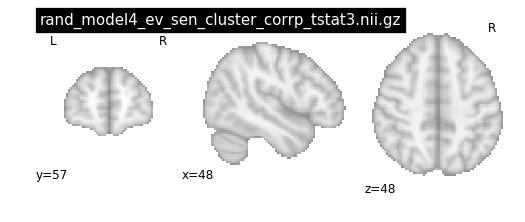

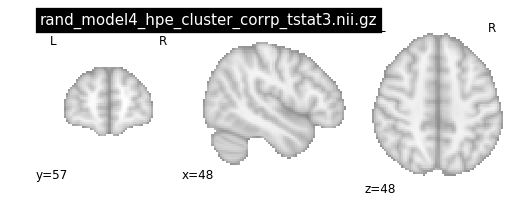

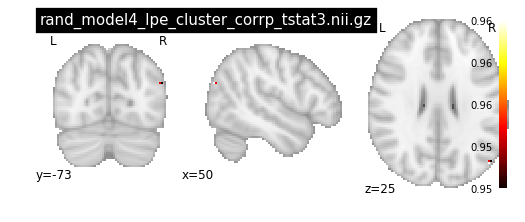

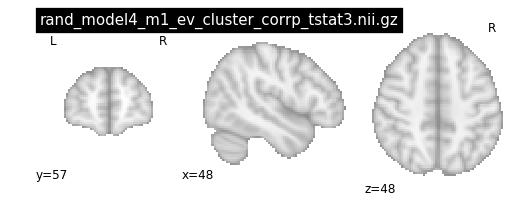

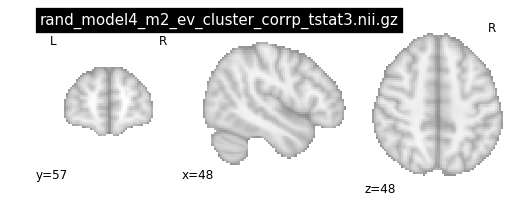

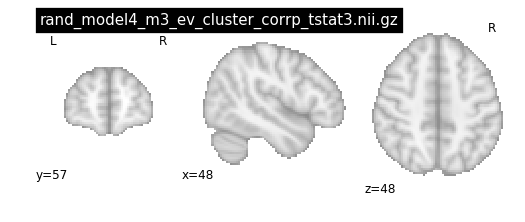

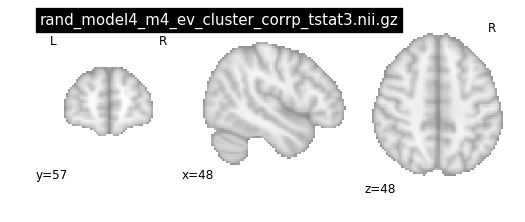

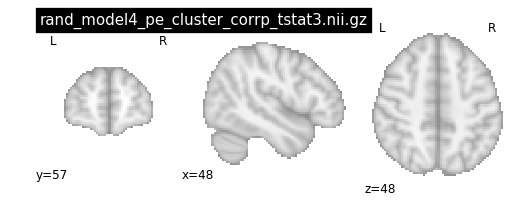

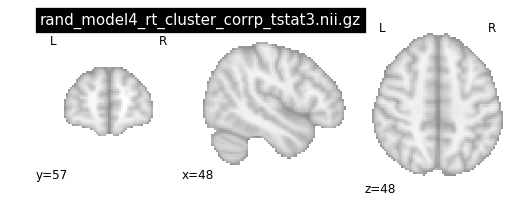

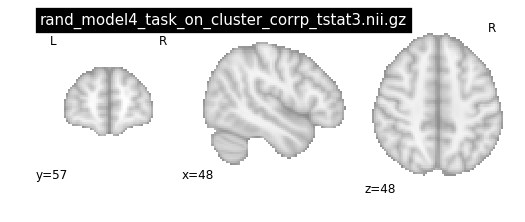

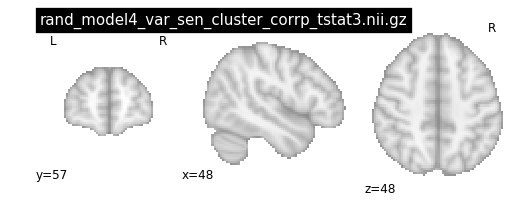

In [10]:
all_paths = glob.glob('/oak/stanford/groups/russpold/data/ds000054/0.0.4/derivatives/nistats/level_3_ev/model4/*/*corrp_tstat3*')
pos_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' not in x]
pos_t_corrected_p_paths.sort()
neg_t_corrected_p_paths = [x for x in all_paths if 'corrp' in x and 'cluster' in x and 'neg' in x]
neg_t_corrected_p_paths.sort()
del all_paths

for i in range(0, len(pos_t_corrected_p_paths)):
    fig = plotting.plot_stat_map(pos_t_corrected_p_paths[i], colorbar=False, title=os.path.basename(pos_t_corrected_p_paths[i]), threshold=0.95, draw_cross=False)
    fig.add_overlay(pos_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_red, colorbar=True)
    fig.add_overlay(neg_t_corrected_p_paths[i], threshold=0.95, cmap=plotting.cm.black_blue, colorbar=False)
